In [3]:
from scipy.fft import fft
from mutagen.wave import WAVE
from parselmouth.praat import call
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa
import librosa.display
import parselmouth
import noisereduce as nr

In [4]:
def get_length(path, type):
    audio = WAVE(f'./wav_files/{type}/' + path)
    audio_info = audio.info
    return audio_info.length

train_df = pd.read_csv('./wav_files/train/train_data.csv')
train_df['Length'] = train_df['paths'].apply(lambda x: get_length(x, 'train'))

test_df = pd.read_csv('./wav_files/test/test_data.csv')
test_df['Length'] = test_df['paths'].apply(lambda x: get_length(x, 'test'))

validation_df = pd.read_csv('./wav_files/validation/validation_data.csv')
validation_df['Length'] = validation_df['paths'].apply(lambda x: get_length(x, 'validation'))

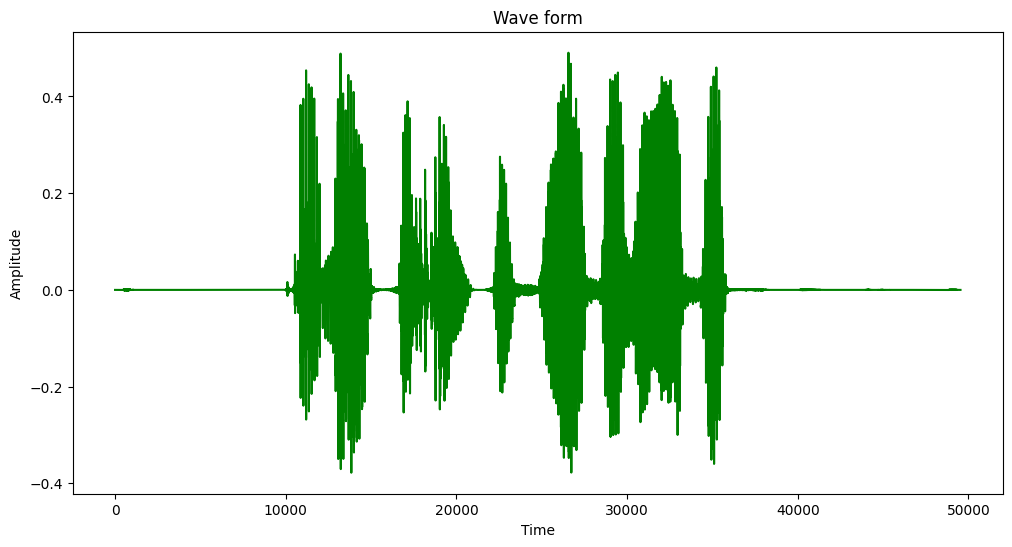

In [5]:
### Get the waveform of the audio file ###
file = train_df['paths'][0]
path = './wav_files/train/' + file

#sample_rate represent the number of samples per seconds in the original signal.
data, sample_rate = librosa.load(path, sr=None)

#clean data
data = nr.reduce_noise(y=data, sr=sample_rate)

plt.figure(figsize=(12,6))
plt.plot(data, color='green')
plt.title('Wave form')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

Text(0, 0.5, 'Power')

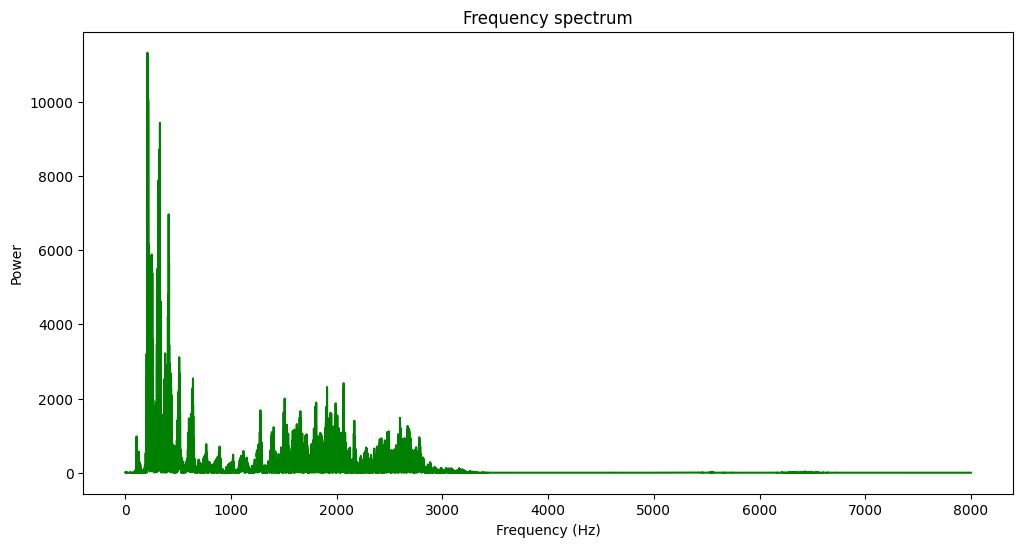

In [6]:
### Get the frequency spectrum ###

fourier_tranform = fft(data)

#Describe how the power = energy/sec varies with the frequency. 
#Better to use it instead of the magnitude spectrum here because it will be easier to find the MFCCs.
#Power = magnitude**2
#Contains the elements on the y axis.
power_spectrum = np.abs(fourier_tranform)**2 

#Find frequencies based on the power.
#Contains the elements on the x axis.
frequencies = np.linspace(0, sample_rate, len(power_spectrum))

plt.figure(figsize=(12, 6))

#Get the first half of the arrays because of the symetrie.
#Symetrie caused by the complex conjugate.
plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(power_spectrum)//2], color='green')
plt.title('Frequency spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')